# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

import xarray as xr
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

# Set display options for pandas
pd.set_option('display.max_columns', None)  # Set to None for unlimited columns or specify a number
# Now, when one displays xarray DataArrays or Datasets, the columns will be wider


# Get the current working directory of the notebook
current_dir = os.getcwd()
# Add the parent directory of the notebook to the Python path
# root_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
root_dir = os.path.abspath(current_dir)
sys.path.append(root_dir)



# Load Data

## Util data

In [2]:
# Define the path to the data directory file
data_dir_path = os.path.join(root_dir, "utils", "data_dir.yml")

with open(data_dir_path, 'r') as ymlfile:
    data_dir = yaml.load(ymlfile, Loader=yaml.FullLoader)
    
data_dir_src = data_dir['data_dir_camels_spat']
data_dir_tgt = data_dir['data_dir_camels_spat_nh']

In [20]:
data_gen_path = os.path.join(root_dir, "utils", "data_general.yml")

with open(data_gen_path, 'r') as ymlfile:
    data_gen = yaml.load(ymlfile, Loader=yaml.FullLoader)
    
countries = data_gen['countries']
camels_spat_metadata = data_gen['camels_spat_metadata']
camels_spat_unusable = data_gen['camels_spat_unusable']
data_sources = data_gen['data_sources']

### Filter usable basins and create txt file

In [4]:
# df_metadata = pd.read_csv(os.path.join(data_dir_src, camels_spat_metadata))
# df_unusable = pd.read_csv(os.path.join(data_dir_src, camels_spat_unusable))
df_metadata = pd.read_csv(os.path.join('data', camels_spat_metadata))
# df_unusable = pd.read_csv(os.path.join('data', camels_spat_unusable))

# Create a dict to map the Country to a list of Station_id
# Create a dictionary to map Country to a list of Station_id
country_station_map = {}
for index, row in df_metadata.iterrows():
    country = row['Country']
    station_id = row['Station_id']
    if country in country_station_map:
        country_station_map[country].append(station_id)
    else:
        country_station_map[country] = [station_id]

## Basin data

In [5]:
# file_name = 'camels_spat_metadata.csv'
file_name = 'rhbn_stations.csv'
# Load data as pandas dataframe
df = pd.read_csv(os.path.join(data_dir_src, file_name), sep=',', header=0)
# Print first 5 rows
len(df)

1027

In [6]:
basin_data_path = os.path.join(data_dir_src, 'basin_data')
list_basin_files = sorted(os.listdir(basin_data_path))

# Filter folders by country name (3 first letters) - create a dictionary
basin_data_path_dict = {}
for country in countries:
    basin_data_path_dict[country] = [basin for basin in list_basin_files if basin[:3] == country]

In [7]:
len(basin_data_path_dict['CAN']) + len(basin_data_path_dict['USA'])

1699

In [22]:
# Load xarray dataset - first basin in the list for first country
relative_path = 'forcing/lumped'
# relative_path = 'forcing/distributed'
# relative_path = 'forcing/raw'

for src in data_sources:

    folder2load = os.path.join(basin_data_path, basin_data_path_dict[countries[0]][0], relative_path)
    eras_files = sorted([f for f in os.listdir(folder2load) if src in f])
    file2load = eras_files[0]
    basin_data = xr.open_dataset(os.path.join(folder2load, file2load))
    display(basin_data)

<xarray.Dataset>
Dimensions:    (time: 744, hru: 1, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1949-12-31T20:00:00 ... 1950-01-31T19:00:00
  * nbnds      (nbnds) int32 1 2
Dimensions without coordinates: hru
Data variables:
    latitude   (hru) float64 ...
    longitude  (hru) float64 ...
    hruId      (hru) float64 ...
    tmean      (time, hru) float32 ...
    prcp       (time, hru) float32 ...
    time_bnds  (nbnds, time) datetime64[ns] ...
Attributes:
    Conventions:  CF-1.6
    Author:       The data were written by CAMELS-spat workflow
    License:      
    Source:       Case: EM-Earth_lumped; remapped by script from library of S...
    History:      Created Wed Sep 20 13:21:58 2023  On Fri Jan 12 10:44:08 20...

<xarray.Dataset>
Dimensions:    (time: 744, hru: 1, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1949-12-31T20:00:00 ... 1950-01-31T19:00:00
  * nbnds      (nbnds) int32 1 2
Dimensions without coordinates: hru
Data variables: (12/19)
    e          (time, hru) float32 ...
    hruId      (hru) float64 ...
    latitude   (hru) float64 ...
    longitude  (hru) float64 ...
    mper       (time, hru) float32 ...
    msdwlwrf   (time, hru) float32 ...
    ...         ...
    t          (time, hru) float32 ...
    u          (time, hru) float32 ...
    v          (time, hru) float32 ...
    w          (time, hru) float32 ...
    phi        (time, hru) float32 ...
    time_bnds  (nbnds, time) datetime64[ns] ...
Attributes:
    Conventions:  CF-1.6
    Author:       The data were written by CAMELS-spat workflow
    License:      
    Source:       Case: ERA5_lumped; remapped by script from library of Sherv...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...
    History:      Wed Jan  3 09:38:19 2024: ncks -x -v reflected_sw,net_radia...

In [9]:
folder2load = os.path.join(basin_data_path, basin_data_path_dict[countries[0]][0], 'observations')
file2load = basin_data_path_dict[countries[0]][0] + '_daily_flow_observations.nc'
basin_obs = xr.open_dataset(os.path.join(folder2load, file2load))
basin_obs

<xarray.Dataset>
Dimensions:                   (time: 25933, nbnds: 2)
Coordinates:
  * time                      (time) datetime64[ns] 1950-01-01 ... 2020-12-31
  * nbnds                     (nbnds) int32 1 2
Data variables:
    q_obs_data_quality        (time) object ...
    q_obs                     (time) float64 ...
    q_obs_is_ice_affected     (time) int32 ...
    q_obs_is_partial_day      (time) int32 ...
    q_obs_is_dry_day          (time) int32 ...
    q_obs_is_estimated_value  (time) int32 ...
    time_bnds                 (nbnds, time) datetime64[ns] ...
Attributes:
    title:        CAMELS-spat streamflow data
    conventions:  CF-1.10
    source:       Streamflow derived from observed water levels
    country:      CAN
    station:      01AD002
    institution:  Water Survey of Canada
    references:   Original data extracted from the Environment and Climate Ch...
    history:      2023-08-02 11:32:55 | File prepared using CAMELS-spat scrip...
    comment:      Water Survey of Canada calculates daily average flow values...

In [10]:
variable_names = [var for var in list(basin_obs.variables.keys()) if 'obs' in var]
variable_names

['q_obs_data_quality',
 'q_obs',
 'q_obs_is_ice_affected',
 'q_obs_is_partial_day',
 'q_obs_is_dry_day',
 'q_obs_is_estimated_value']

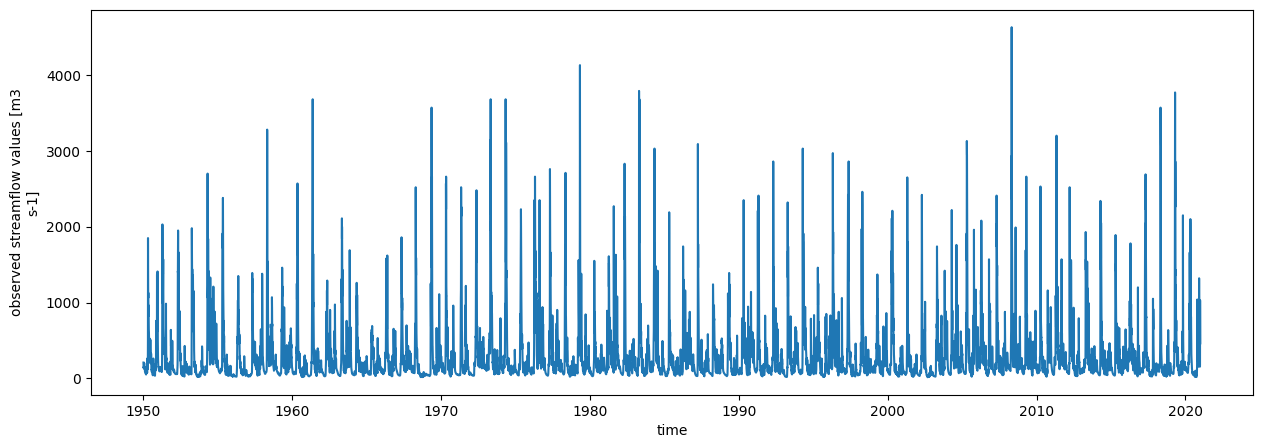

In [19]:
var_to_plot = variable_names[1]
# Plot the data
basin_obs[var_to_plot].plot.line(hue='station_id', figsize=(15, 5))